<a href="https://colab.research.google.com/github/nweissmueller/COLAB/blob/main/Linear_Programming_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://thegeeksdiary.com/2023/03/22/linear-programming-in-python-using-pulp-part-3-optimizing-investment-portfolios-with-multi-objective-optimization/

**Problem Summary**

Section	Description
Problem	Finding the optimal investment portfolio that balances multiple objectives, such as maximizing returns and minimizing risk

**Objectives**

1. Maximize the expected return on investment,
2. Minimize the risk of the portfolio

**Constraints**
1. The portfolio must be fully invested,
2. The investment in each asset must be non-negative

**Approach**

Use linear programming and the Pulp library in Python to find the optimal investment portfolio.

The problem can be formulated as the following linear programming problem:

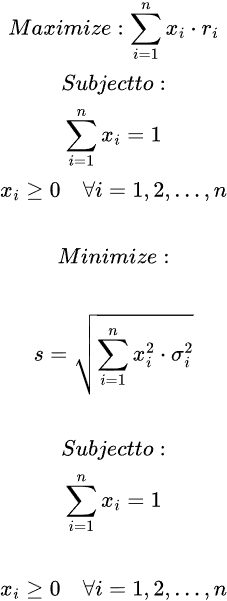

Tabular Summary of the Problem

Symbol	  Description

* x_i	      Fraction of the investment portfolio invested in asset i

* r_i	Expected return on investment for asset i

* s	Standard deviation of the portfolio

* σ_i	Standard deviation of asset i

* n	Number of assets in the portfolio

**Steps to solve the LP problem**

1.   Import the Pulp library
2.   Create two new LpProblem objects, one for maximizing the return and one for minimizing the risk
3. Define variables using the LpVariable class, one for each asset in the portfolio
4. Define the expected return and standard deviation for each asset
5. Add constraints to both problems, ensuring that the portfolio is fully invested and the investment in each asset is non-negative
6. Define the objectives for both problems, maximizing the expected return and minimizing the risk
7. Solve both problems using the solve method of the LpProblem class
8. Print the results, including the fraction of the portfolio invested in each asset and the expected return and standard deviation of the portfolio

In [2]:
!pip install pulp

from pulp import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 76.3 MB/s eta 0:00:00


In [5]:
# Define the number of assets in the portfolio
n = 4

# Define the expected return and standard deviation for each asset
returns = [0.1, 0.2, 0.15, 0.3]
deviations = [0.15, 0.2, 0.1, 0.3]

# Create two new LpProblem objects, one for maximizing the return and one for minimizing the risk
return_problem = LpProblem("Maximize Return", LpMaximize)
risk_problem = LpProblem("Minimize Risk", LpMinimize)

# Define variables using the LpVariable class, one for each asset in the portfolio
x = [LpVariable(f"x{i}", 0, 1) for i in range(n)]

# Add constraints to both problems, ensuring that the portfolio is fully invested and the investment in each asset is non-negative
return_problem += sum(x) == 1
risk_problem += sum(x) == 1

for i in range(n):
    return_problem += x[i] >= 0
    risk_problem += x[i] >= 0

# Define the objectives for both problems, maximizing the expected return and minimizing the risk
return_problem += sum([x[i] * returns[i] for i in range(n)])
risk_problem += sum([x[i] * deviations[i] for i in range(n)])

# Solve both problems using the solve method of the LpProblem class
return_problem.solve()
risk_problem.solve()

# Print the results, including the fraction of the portfolio invested in each asset and the expected return and standard deviation of the portfolio
print("--- Results ---")
print("Maximize Return:")
for i in range(n):
    print(f"Asset {i}: {x[i].value()}")
print(f"Expected Return: {value(return_problem.objective)}")

print("Minimize Risk:")
for i in range(n):
    print(f"Asset {i}: {x[i].value()}")
print(f"Standard Deviation: {value(risk_problem.objective)}")

--- Results ---
Maximize Return:
Asset 0: 0.0
Asset 1: 0.0
Asset 2: 1.0
Asset 3: 0.0
Expected Return: 0.15
Minimize Risk:
Asset 0: 0.0
Asset 1: 0.0
Asset 2: 1.0
Asset 3: 0.0
Standard Deviation: 0.1
